In [2]:
import cv2
import matplotlib.pyplot as plt 
import math
from math import *
import numpy as np

from skimage.measure import label, regionprops, regionprops_table
from skimage.transform import rotate
import skimage.io as io
import argparse 

import pandas as pd

         centroid-0   centroid-1  orientation  axis_major_length  \
0          0.000000     0.000000     0.785398           0.000000   
1          0.000000     1.000000     0.785398           0.000000   
2          0.500000     1.500000     0.785398           2.828427   
3          0.500000     3.000000     0.000000           2.000000   
4          1.428571     3.714286    -0.611013           4.760703   
...             ...          ...          ...                ...   
166989  1029.000000  1095.000000     0.785398           0.000000   
166990  1029.000000  1107.500000     1.570796           9.165151   
166991  1029.000000  1136.000000     0.785398           0.000000   
166992  1029.000000  1138.000000     1.570796           3.265986   
166993  1029.000000  1187.500000     1.570796           2.000000   

        axis_minor_length  
0                0.000000  
1                0.000000  
2                0.000000  
3                0.000000  
4                2.715975  
...            

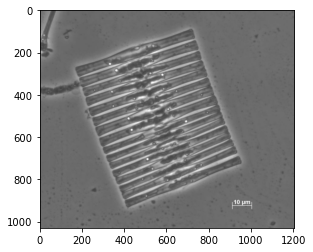

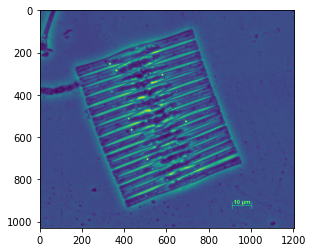

In [3]:
plancton = cv2.imread('./img_test.jpg') 
plt.figure()
plt.imshow(plancton)
plancton = cv2.cvtColor(plancton, cv2.COLOR_BGR2GRAY)
plt.figure()
plt.imshow(plancton)

# setting threshold of gray image
_, threshold = cv2.threshold(plancton, 127, 255, cv2.THRESH_BINARY)
  
# using a findContours() function
contours, _ = cv2.findContours(threshold, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

i = 0

for k in contours:
  
    # here we are ignoring first counter because 
    # findcontour function detects whole image as shape
    if i == 0:
        i = 1
        continue
  
    # cv2.approxPloyDP() function to approximate the shape
    approx = cv2.approxPolyDP(
        k, 0.01 * cv2.arcLength(k, True), True)
      
    # using drawContours() function
    img = cv2.drawContours(plancton, [k], 0, (0, 0, 255), 5)
    
    M = cv2.moments(k)
    if M['m00'] != 0.0:
        x = int(M['m10']/M['m00'])
        y = int(M['m01']/M['m00'])
    
    cv2.putText(plancton, 'Rectangular', (x, y), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 255), 2)

label_img = label(img)
regions = regionprops(label_img)
props = regionprops_table(label_img, properties=('centroid',
                                                 'orientation',
                                                 'axis_major_length',
                                                 'axis_minor_length'))

pd.DataFrame(props)
tab = pd.DataFrame(props)
print(tab)

In [7]:
print(contours) #on mesure une largeur de 414 -> 944 pixels, longueur de 

(array([[[440, 944]]], dtype=int32), array([[[414, 944]],

       [[415, 945]],

       [[415, 944]]], dtype=int32), array([[[905, 923]],

       [[905, 924]]], dtype=int32), array([[[935, 918]]], dtype=int32), array([[[929, 918]]], dtype=int32), array([[[976, 916]]], dtype=int32), array([[[930, 916]],

       [[931, 917]]], dtype=int32), array([[[927, 916]]], dtype=int32), array([[[976, 907]]], dtype=int32), array([[[913, 907]]], dtype=int32), array([[[ 907,  906]],

       [[ 907,  941]],

       [[ 908,  941]],

       [[ 908,  925]],

       [[ 909,  924]],

       [[ 998,  924]],

       [[ 999,  925]],

       [[ 999,  941]],

       [[1000,  941]],

       [[1000,  906]],

       [[ 999,  906]],

       [[ 999,  922]],

       [[ 998,  923]],

       [[ 909,  923]],

       [[ 908,  922]],

       [[ 908,  906]]], dtype=int32), array([[[914, 903]]], dtype=int32), array([[[954, 902]],

       [[954, 921]],

       [[957, 921]],

       [[957, 916]],

       [[958, 915]],

       

In [ ]:
# newImg = cv2.Sobel(plancton, cv2.CV_8U, 1, 1, ksize = 1)
# cv2.imshow(newImg)

In [8]:
print(contours[0,0])

TypeError: tuple indices must be integers or slices, not tuple